In [ ]:

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings globally
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from mapping import compute_area_scores

from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_comparison

import pandas as pd

IMAGE_FOLDER = "../Preproc2/images/"
NUM_WORKERS = 15
METRIC = "PLS"


# Mouse-vision style parameters (for final results)
# N_BOOT = 100  # n_iter in mouse-vision
# N_SPLITS = 10  # num_splits in mouse-vision
# PLS_N_COMPONENTS = 25

N_BOOT = 10
N_SPLITS = 5
PLS_N_COMPONENTS = 25

# LAYERS_KEEP = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6", "fc7"]
LAYERS_KEEP = ["pool1","pool2","relu3","relu4","pool5","fc6_relu","fc7_relu"]

paths = {
    "random": "random",
    "Inet": "ImageNet",
    "supervised_no-diet": "checkpoints/supervised_no-diet/20250915_023037_sgd/checkpoint_epoch_60.pth",
    "supervised_diet": "checkpoints/supervised_diet/20251006_071020_no-aug/checkpoint_epoch_60.pth",
    "self-supervised_no-diet": "checkpoints/self-supervised_no-diet/20250922_144504_warmup+dynamic/checkpoint_epoch_60.pth",
    "self-supervised_diet": "checkpoints/self-supervised_diet/20250929_010742_warmup+dynamic/checkpoint_epoch_60.pth"
}

models = {}

scores = {key: {} for key in paths.keys()}

SAVE_RESULTS = True
LOAD_RESULTS = False

# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

In [12]:
models["random"] = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="random",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-random",
    return_in_memory=False
)

In [13]:
models["Inet"] = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="ImageNet",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-Inet",
    return_in_memory=False
)

In [14]:
models["supervised_no-diet"] = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/supervised_no-diet/20250915_023037_sgd/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-supervised-no-diet",
    return_in_memory=False
)

In [15]:
models["supervised_diet"] = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/supervised_diet/20251006_071020_no-aug/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-supervised-diet",
    return_in_memory=False
)

In [16]:
models["self-supervised_no-diet"] = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/self-supervised_no-diet/20250922_144504_warmup+dynamic/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-self-supervised-no-diet",
    return_in_memory=False
)

In [17]:
models["self-supervised_diet"] = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/self-supervised_diet/20250929_010742_warmup+dynamic/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-self-supervised-diet",
    return_in_memory=False
)

Loading the index file with paths to neural data

In [18]:
index_df = pd.read_csv('../Preproc2/data/combined_index.csv')

In [ ]:
# random
scores["random"]["layer_scores"], scores["random"]["median_scores"] = compute_area_scores(
    models["random"],
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='random'
)

Layer: pool1, Area: VISal, Specimen: 735109609, Score: 0.3789
Layer: pool1, Area: VISal, Specimen: 738651054, Score: 0.3023
Layer: pool1, Area: VISal, Specimen: 739783171, Score: 0.3427
Layer: pool1, Area: VISal, Specimen: 742714475, Score: 0.3213
Layer: pool1, Area: VISal, Specimen: 757329624, Score: 0.3320
Layer: pool1, Area: VISal, Specimen: 775876828, Score: 0.2758
Layer: pool1, Area: VISam, Specimen: 730756780, Score: 0.4263
Layer: pool1, Area: VISam, Specimen: 734865738, Score: 0.2989
Layer: pool1, Area: VISam, Specimen: 738651054, Score: 0.2708
Layer: pool1, Area: VISam, Specimen: 739783171, Score: 0.3229
Layer: pool1, Area: VISam, Specimen: 742602892, Score: 0.3640
Layer: pool1, Area: VISam, Specimen: 744915204, Score: 0.2388
Layer: pool1, Area: VISam, Specimen: 775876828, Score: 0.2092
Layer: pool1, Area: VISl, Specimen: 716813543, Score: 0.2540
Layer: pool1, Area: VISl, Specimen: 723627604, Score: 0.1766
Layer: pool1, Area: VISl, Specimen: 739783171, Score: 0.2943
Layer: pool

In [40]:
# inet
scores["Inet"]["layer_scores"], scores["Inet"]["median_scores"] = compute_area_scores(
    models["Inet"],
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='ImportError'
)

Layer: pool1, Area: VISal, Specimen: 735109609, Score: 0.3940
Layer: pool1, Area: VISal, Specimen: 738651054, Score: 0.3060
Layer: pool1, Area: VISal, Specimen: 739783171, Score: 0.3418
Layer: pool1, Area: VISal, Specimen: 742714475, Score: 0.3142
Layer: pool1, Area: VISal, Specimen: 757329624, Score: 0.3348
Layer: pool1, Area: VISal, Specimen: 775876828, Score: 0.2421
Layer: pool1, Area: VISam, Specimen: 730756780, Score: 0.4163
Layer: pool1, Area: VISam, Specimen: 734865738, Score: 0.3008
Layer: pool1, Area: VISam, Specimen: 738651054, Score: 0.2563
Layer: pool1, Area: VISam, Specimen: 739783171, Score: 0.2945
Layer: pool1, Area: VISam, Specimen: 742602892, Score: 0.3436
Layer: pool1, Area: VISam, Specimen: 744915204, Score: 0.2349
Layer: pool1, Area: VISam, Specimen: 775876828, Score: 0.1904
Layer: pool1, Area: VISl, Specimen: 716813543, Score: 0.2241
Layer: pool1, Area: VISl, Specimen: 723627604, Score: 0.1755
Layer: pool1, Area: VISl, Specimen: 739783171, Score: 0.2853
Layer: pool

In [41]:
# inet no diet
scores["supervised_no-diet"]["layer_scores"], scores["supervised_no-diet"]["median_scores"] = compute_area_scores(
    models["supervised_no-diet"],
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='supervised_no-diet'
)

Layer: pool1, Area: VISal, Specimen: 735109609, Score: 0.3887
Layer: pool1, Area: VISal, Specimen: 738651054, Score: 0.3019
Layer: pool1, Area: VISal, Specimen: 739783171, Score: 0.3408
Layer: pool1, Area: VISal, Specimen: 742714475, Score: 0.3365
Layer: pool1, Area: VISal, Specimen: 757329624, Score: 0.3410
Layer: pool1, Area: VISal, Specimen: 775876828, Score: 0.2966
Layer: pool1, Area: VISam, Specimen: 730756780, Score: 0.4133
Layer: pool1, Area: VISam, Specimen: 734865738, Score: 0.3280
Layer: pool1, Area: VISam, Specimen: 738651054, Score: 0.2904
Layer: pool1, Area: VISam, Specimen: 739783171, Score: 0.3188
Layer: pool1, Area: VISam, Specimen: 742602892, Score: 0.3662
Layer: pool1, Area: VISam, Specimen: 744915204, Score: 0.2738
Layer: pool1, Area: VISam, Specimen: 775876828, Score: 0.2440
Layer: pool1, Area: VISl, Specimen: 716813543, Score: 0.2445
Layer: pool1, Area: VISl, Specimen: 723627604, Score: 0.2209
Layer: pool1, Area: VISl, Specimen: 739783171, Score: 0.2984
Layer: pool

In [42]:
# inet diet
scores["supervised_diet"]["layer_scores"], scores["supervised_diet"]["median_scores"] = compute_area_scores(
    models["supervised_diet"],
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='supervised_diet'
)

Layer: pool1, Area: VISal, Specimen: 735109609, Score: 0.3950
Layer: pool1, Area: VISal, Specimen: 738651054, Score: 0.3076
Layer: pool1, Area: VISal, Specimen: 739783171, Score: 0.3689
Layer: pool1, Area: VISal, Specimen: 742714475, Score: 0.3329
Layer: pool1, Area: VISal, Specimen: 757329624, Score: 0.3467
Layer: pool1, Area: VISal, Specimen: 775876828, Score: 0.2734
Layer: pool1, Area: VISam, Specimen: 730756780, Score: 0.4259
Layer: pool1, Area: VISam, Specimen: 734865738, Score: 0.3363
Layer: pool1, Area: VISam, Specimen: 738651054, Score: 0.2765
Layer: pool1, Area: VISam, Specimen: 739783171, Score: 0.3109
Layer: pool1, Area: VISam, Specimen: 742602892, Score: 0.3745
Layer: pool1, Area: VISam, Specimen: 744915204, Score: 0.2577
Layer: pool1, Area: VISam, Specimen: 775876828, Score: 0.2113
Layer: pool1, Area: VISl, Specimen: 716813543, Score: 0.2439
Layer: pool1, Area: VISl, Specimen: 723627604, Score: 0.2202
Layer: pool1, Area: VISl, Specimen: 739783171, Score: 0.3236
Layer: pool

In [43]:
# inet ss no diet
scores["self-supervised_no-diet"]["layer_scores"], scores["self-supervised_no-diet"]["median_scores"] = compute_area_scores(
    models["self-supervised_no-diet"],
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='self-supervised_no-diet'
)

Layer: pool1, Area: VISal, Specimen: 735109609, Score: 0.3799
Layer: pool1, Area: VISal, Specimen: 738651054, Score: 0.3114
Layer: pool1, Area: VISal, Specimen: 739783171, Score: 0.3779
Layer: pool1, Area: VISal, Specimen: 742714475, Score: 0.3305
Layer: pool1, Area: VISal, Specimen: 757329624, Score: 0.3247
Layer: pool1, Area: VISal, Specimen: 775876828, Score: 0.2762
Layer: pool1, Area: VISam, Specimen: 730756780, Score: 0.4103
Layer: pool1, Area: VISam, Specimen: 734865738, Score: 0.3260
Layer: pool1, Area: VISam, Specimen: 738651054, Score: 0.2848
Layer: pool1, Area: VISam, Specimen: 739783171, Score: 0.3204
Layer: pool1, Area: VISam, Specimen: 742602892, Score: 0.3530
Layer: pool1, Area: VISam, Specimen: 744915204, Score: 0.2564
Layer: pool1, Area: VISam, Specimen: 775876828, Score: 0.2340
Layer: pool1, Area: VISl, Specimen: 716813543, Score: 0.2630
Layer: pool1, Area: VISl, Specimen: 723627604, Score: 0.2028
Layer: pool1, Area: VISl, Specimen: 739783171, Score: 0.3018
Layer: pool

In [44]:
# inet ss diet
scores["self-supervised_diet"]["layer_scores"], scores["self-supervised_diet"]["median_scores"] = compute_area_scores(
    models["self-supervised_diet"],
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='self-supervised_diet'
)

Layer: pool1, Area: VISal, Specimen: 735109609, Score: 0.3808
Layer: pool1, Area: VISal, Specimen: 738651054, Score: 0.3013
Layer: pool1, Area: VISal, Specimen: 739783171, Score: 0.3409
Layer: pool1, Area: VISal, Specimen: 742714475, Score: 0.3306
Layer: pool1, Area: VISal, Specimen: 757329624, Score: 0.3467
Layer: pool1, Area: VISal, Specimen: 775876828, Score: 0.2733
Layer: pool1, Area: VISam, Specimen: 730756780, Score: 0.4124
Layer: pool1, Area: VISam, Specimen: 734865738, Score: 0.3264
Layer: pool1, Area: VISam, Specimen: 738651054, Score: 0.2926
Layer: pool1, Area: VISam, Specimen: 739783171, Score: 0.3264
Layer: pool1, Area: VISam, Specimen: 742602892, Score: 0.3728
Layer: pool1, Area: VISam, Specimen: 744915204, Score: 0.2369
Layer: pool1, Area: VISam, Specimen: 775876828, Score: 0.2311
Layer: pool1, Area: VISl, Specimen: 716813543, Score: 0.2624
Layer: pool1, Area: VISl, Specimen: 723627604, Score: 0.1930
Layer: pool1, Area: VISl, Specimen: 739783171, Score: 0.3054
Layer: pool

In [ ]:
from plotter import plot_comparison_multi

# plot_comparison_multi([median_scores_random, median_scores_inet, median_scores_inet_no_diet, median_scores_inet_diet, median_scores_inet_ss_no_diet, median_scores_inet_ss_diet], ["random", "ImageNet", "supervised_no-diet", "supervised_diet", "self-supervised_no-diet", "self-supervised_diet"], metric_name=METRIC)
# plot_comparison_multi([median_scores_random], ["random"], metric_name=METRIC)

# items = list(scores.items())  # [(label, value_dict), ...]
items = [
    (k, v) for k, v in scores.items()
    if isinstance(v, dict)
    and "median_scores" in v
    and v["median_scores"] is not None
    and (not hasattr(v["median_scores"], "empty") or not v["median_scores"].empty)
]

labels = [k for k, _ in items]
series = [v["median_scores"] for _, v in items]

plot_comparison_multi(series, labels)

In [46]:
SAVE_RESULTS = True
LOAD_RESULTS = False

In [49]:
if SAVE_RESULTS:
    import os
    os.makedirs("artifacts", exist_ok=True)
    for model_name, score in scores.items():
        score["median_scores"].to_pickle(f"artifacts/median_scores_{model_name}.pkl")
        score["layer_scores"].to_pickle(f"artifacts/layer_scores_{model_name}.pkl")

In [50]:
if LOAD_RESULTS:
    for model_name, score in scores.items():
        score = pd.read_pickle(f"scores_{model_name}.pkl")

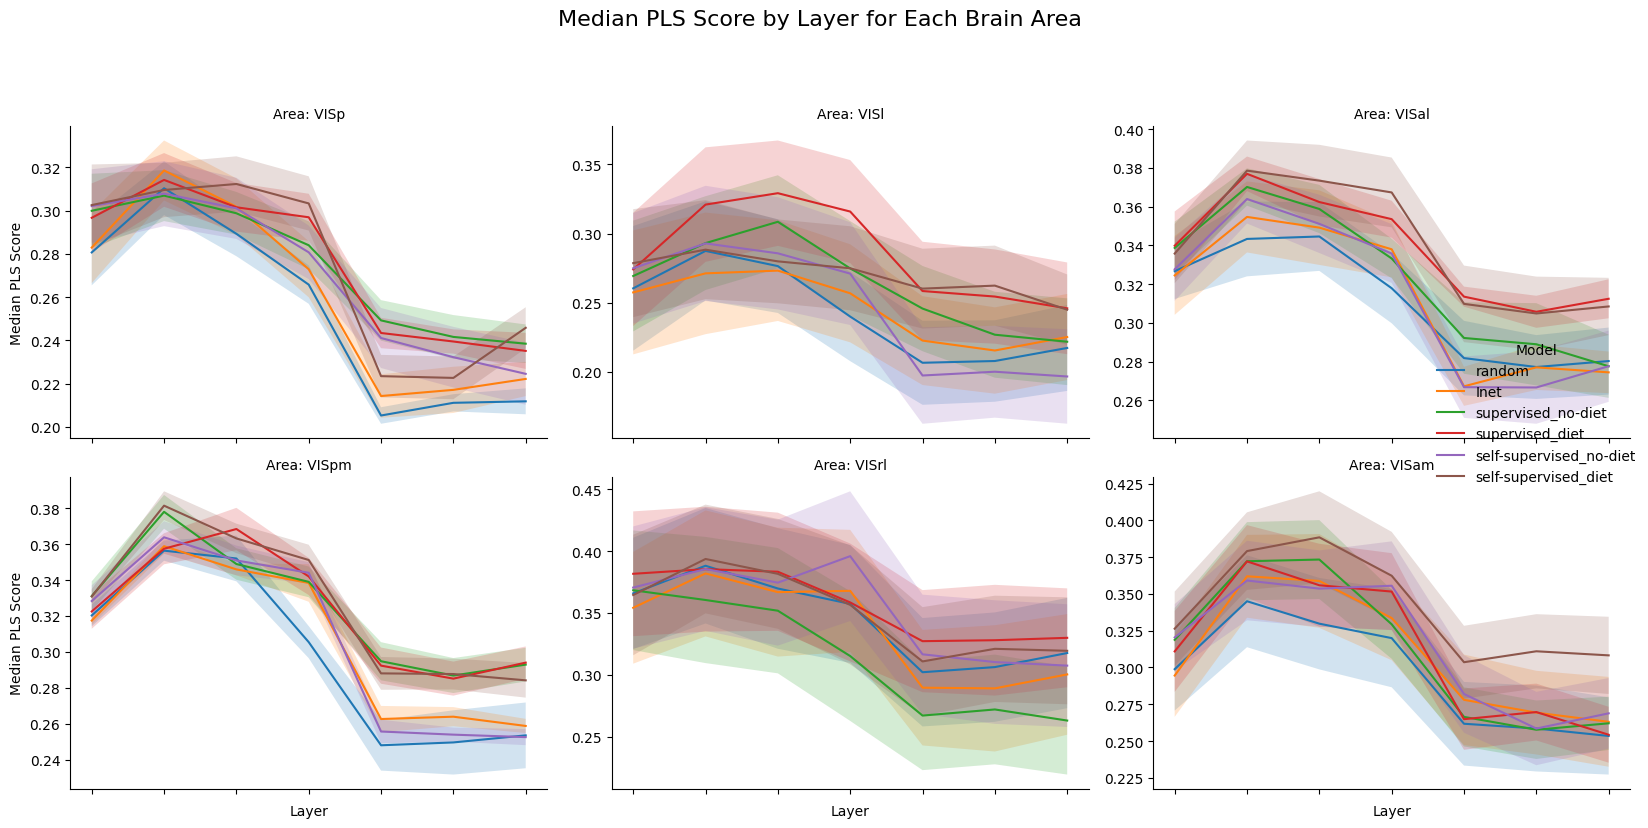

In [51]:
from plotter import plot_comparison_multi

# plot_comparison_multi([median_scores_random, median_scores_inet, median_scores_inet_no_diet, median_scores_inet_diet, median_scores_inet_ss_no_diet, median_scores_inet_ss_diet], ["random", "ImageNet", "supervised_no-diet", "supervised_diet", "self-supervised_no-diet", "self-supervised_diet"], metric_name=METRIC)
# plot_comparison_multi([median_scores_random], ["random"], metric_name=METRIC)

# items = list(scores.items())  # [(label, value_dict), ...]
items = [
    (k, v) for k, v in scores.items()
    if isinstance(v, dict)
    and "median_scores" in v
    and v["median_scores"] is not None
    and (not hasattr(v["median_scores"], "empty") or not v["median_scores"].empty)
]

labels = [k for k, _ in items]
series = [v["median_scores"] for _, v in items]

plot_comparison_multi(series, labels)